In [1]:
%pip install opencv-python numpy

import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.ocr_utils import *

print("import successful")

Note: you may need to restart the kernel to use updated packages.
import successful


In [3]:
#Exemple usage
# image_path = "path/to/image.jpg"
image_path = "/Users/kcsam/Desktop/github/AI-Sudoku/test/test2.webp"
img = cv2.imread(image_path)

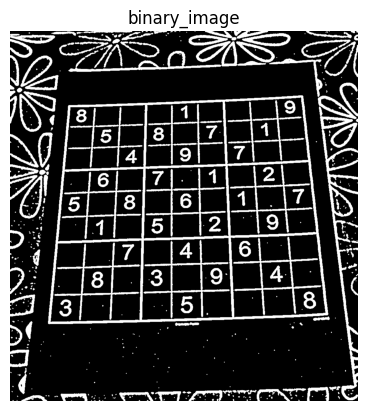

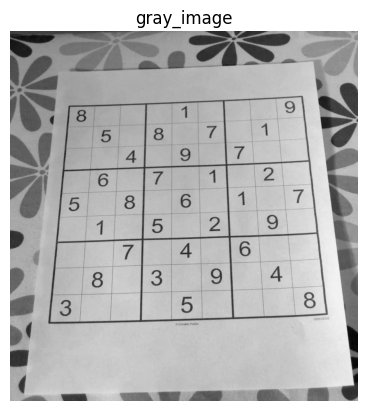

In [4]:
#initialize the detector
processed_img = preprocessing(img)
binary_img = processed_img['binary_image']
gray_image = processed_img['gray_image']

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for key, image in processed_img.items():
    if len(image.shape) == 2: 
        plt.imshow(image, cmap='gray')
    else: 
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(key)
    plt.axis("off") 
    plt.show()


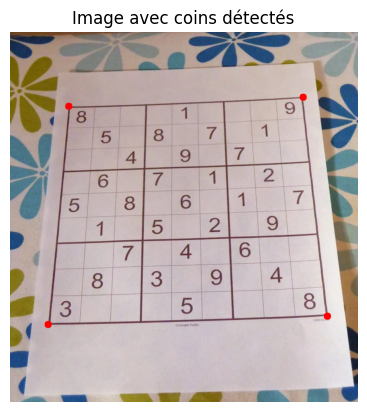

In [5]:
#get corners of the image (sudoku)
contours_sudoku = get_contours(binary_img)

for point in contours_sudoku:
    x, y = point
    cv2.circle(img_rgb, (x, y), radius=10, color=(255, 0, 0), thickness=-1)  # Cercle rouge rempli

plt.imshow(img_rgb)
plt.title("Image avec coins détectés")
plt.axis('off')
plt.show()



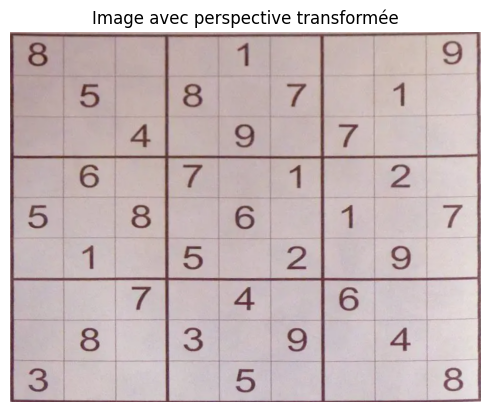

In [6]:
# redimensionner l'image a partir des coins
perspectiveTransform = perspective_transform(img, contours_sudoku)
plt.imshow(cv2.cvtColor(perspectiveTransform, cv2.COLOR_BGR2RGB))
plt.title("Image avec perspective transformée")
plt.axis('off')  # Masquer les axes
plt.show()

[((0, 0), (85, 67)), ((85, 0), (171, 67)), ((171, 0), (257, 67)), ((257, 0), (343, 67)), ((343, 0), (428, 67)), ((428, 0), (514, 67)), ((514, 0), (600, 67)), ((600, 0), (686, 67)), ((686, 0), (772, 67)), ((0, 67), (85, 134)), ((85, 67), (171, 134)), ((171, 67), (257, 134)), ((257, 67), (343, 134)), ((343, 67), (428, 134)), ((428, 67), (514, 134)), ((514, 67), (600, 134)), ((600, 67), (686, 134)), ((686, 67), (772, 134)), ((0, 134), (85, 202)), ((85, 134), (171, 202)), ((171, 134), (257, 202)), ((257, 134), (343, 202)), ((343, 134), (428, 202)), ((428, 134), (514, 202)), ((514, 134), (600, 202)), ((600, 134), (686, 202)), ((686, 134), (772, 202)), ((0, 202), (85, 269)), ((85, 202), (171, 269)), ((171, 202), (257, 269)), ((257, 202), (343, 269)), ((343, 202), (428, 269)), ((428, 202), (514, 269)), ((514, 202), (600, 269)), ((600, 202), (686, 269)), ((686, 202), (772, 269)), ((0, 269), (85, 336)), ((85, 269), (171, 336)), ((171, 269), (257, 336)), ((257, 269), (343, 336)), ((343, 269), (4

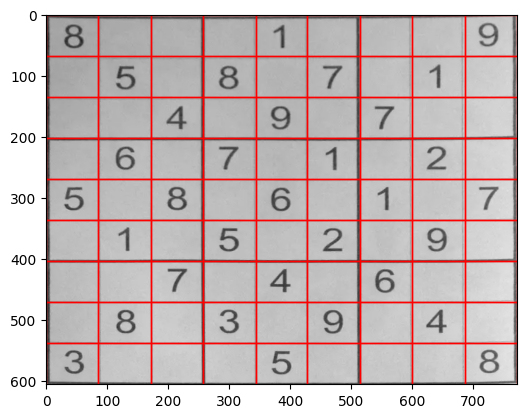

In [7]:
gray = cv2.cvtColor(perspectiveTransform, cv2.COLOR_BGR2GRAY)
allCell = get_cell(gray)
print(allCell)
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
for idx, point in enumerate(allCell):
    (startX, startY), (endX, endY) = point 
    rect = plt.Rectangle((startX, startY), endX - startX, endY - startY, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

In [ ]:
digits = get_digits(gray,allCell)
fig, axes = plt.subplots(9, 9, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    if i < len(digits):
        digit = digits[i]
        if digit is not None and digit.size != 0:
            ax.imshow(digit, cmap='gray')
        else:
            ax.imshow(np.zeros((28,28)), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()